In [1]:
import os
import numpy as np
import os.path as osp
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pathlib import Path
from collections import Counter

from itertools import groupby
from operator import itemgetter

from matplotlib.pyplot import MultipleLocator
# sns.set(style="whitegrid",font_scale=1)
sns.set(style="whitegrid",font_scale=1)
import matplotlib.collections as clt
import ptitprince as pt

In [ ]:
internal_data_pths = ['./datasets/LN_classify/Fudan_HN_LN_22-23_all/Fudan_HN_LN_20231204_patches', 
                      './datasets/LN_classify/Fudan_HN_LN_22-23_all/Fudan_HN_LN_220528_patches',
                      './datasets/LN_classify/Fudan_HN_LN_22-23_all/Fudan_HN_LN_230508_patches'
                      ]

external_data_pths = ['./datasets/LN_classify/Fudan_HN_LN_22-23_all/CGMH/CGMH_2024_patches',
                      './datasets/LN_classify/Fudan_HN_LN_22-23_all/TCGA/TCGA-HNSC_selected_patches',
                      './datasets/LN_classify/Fudan_HN_LN_22-23_all/CGMH_Oral/CGMH_Oral_patches'
                      ]

In [3]:
ene_list = set()
for data_pth in internal_data_pths:
    for f in Path(data_pth).rglob('*_mask.nii.gz'):
        if '_pos_ENE' in str(f):
            basename = osp.basename(str(f)).replace("_pos_ENE_mask.nii.gz", "")
            ene_list.add(basename)

for data_pth in external_data_pths:
    for f in Path(data_pth).rglob('*_mask.nii.gz'):
        if '_pos_ENE' in str(f):
            basename = osp.basename(str(f)).replace("_pos_ENE_mask.nii.gz", "")
            ene_list.add(basename)

#### Meta and ENE size distributions

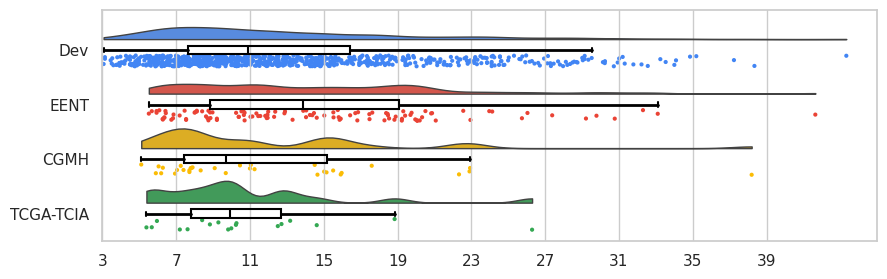

In [9]:
ds_names = {0: 'Dev', 1: 'EENT', 2: 'CGMH', 3: 'TCGA-TCIA', 4: 'CGMH-Oral'}
colors = ['lightgray', 'cornflowerblue', 'salmon', 'darkviolet', 'orange']
# center_neg_stats = {"RECIST(mm)": [], "Institutes": []}
# center_meta_stats = {"RECIST(mm)": [], "Institutes": []}
# center_ene_stats = {"RECIST(mm)": [], "Institutes": []}

center_stats = {"Institutes": [], "RECIST(mm)": [], "Category": []}

# internal
for data_idx, crop_pth in enumerate(internal_data_pths):
    cropfile = osp.join(crop_pth, "cropping_list.csv")
    df = pd.read_csv(cropfile)
    for idx, row in df.iterrows():
        if data_idx == 0 and 'Ext' in row['path']:
            continue
        if row['label'] == 1:
            center_stats['RECIST(mm)'].append(np.round(float(row['recist']), 2))
            center_stats['Institutes'].append("Dev")
            center_stats['Category'].append("Nodal metastasis, ENE(-)")

# external
for data_idx, crop_pth in enumerate([internal_data_pths[0]] + external_data_pths):
    name = ds_names[data_idx]
    cropfile = osp.join(crop_pth, "cropping_list.csv")
    df = pd.read_csv(cropfile)
    inst = ds_names[data_idx + 1]
    if inst == "CGMH-Oral":
        continue
    for idx, row in df.iterrows():
        if data_idx == 0:
            if 'Ext' not in row['path']:
                continue
        if row['label'] == 1:
            center_stats['RECIST(mm)'].append(np.round(float(row['recist']), 2))
            center_stats['Institutes'].append(inst)
            center_stats['Category'].append("Nodal metastasis, ENE(-)")
        
    
def draw_violinplot(stats, x_cat, y_cat, palette):
    dx = x_cat; dy = y_cat; ort = "h"; sigma = .15
    # pal = "Set2"
    # f, ax = plt.subplots(figsize=(10, 4))
    f, ax = plt.subplots(figsize=(10, 3))

    ax=pt.RainCloud(x = dx, y = dy, data = stats, palette = palette, bw = sigma, width_viol = 0.8,
                ax = ax, orient = ort , alpha = 1.0, move=.2, dodge = True, box_showfliers=False,)

    ax.set_xlim(3,45)
    ax.xaxis.set_ticks(np.arange(3,42 + 1, 4))

    plt.savefig("meta_SAD_cloudrain_maintext.svg")
    # plt.savefig("Supplement_SAD_meta_all.svg")
# draw_violinplot(center_neg_stats, ds_names, colors, "Negative LNs")
# draw_violinplot(center_meta_stats, ds_names, colors, "Metastatic LNs")
# draw_violinplot(center_ene_stats, ds_names, colors[:3]+colors[4:], "ENEs")
# met_palette = sns.set_palette(sns.color_palette(["#8FA2DC", "#81D0BB", "#FFCB5D", "#FEAAC2"]))
# met_palette = sns.set_palette(sns.color_palette(["#376795", "#72BCD5", "#FFD06F", "#E76254"]))
# met_palette = sns.set_palette(sns.color_palette(["#4285F4", "#EA4335", "#FBBC05", "#34A853"]))
met_palette = sns.set_palette(sns.color_palette(["#4285F4", "#EA4335", "#FBBC05", "#34A853", "#9B04DB"]))
# met_palette = sns.set_palette(sns.color_palette(["#926DBD", "#F277AF", "#FFCD8C", "#A8D696"]))
# met_palette = sns.set_palette(sns.color_palette(["#1DC2A2", "#F5DE78", "#FF69BB", "#AC72E8"]))
# met_palette = sns.set_palette(sns.color_palette(["#6E60CC", "#1ED67A", "#FFE356", "#FF5B7C"]))
draw_violinplot(center_stats, x_cat="Institutes", y_cat="RECIST(mm)", palette=met_palette)

Internal data done


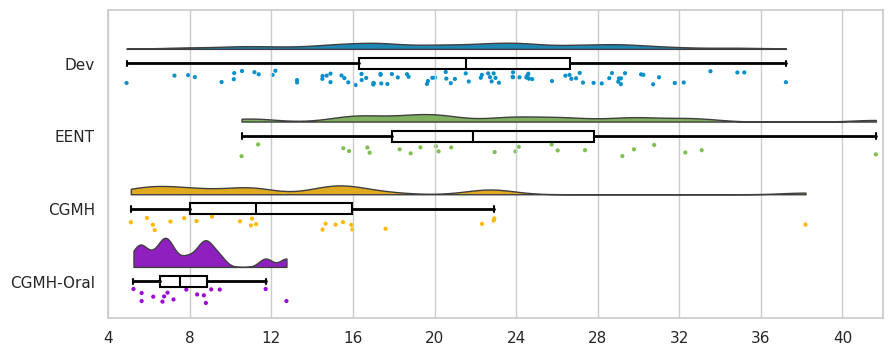

In [5]:
ds_names = {0: 'Dev', 1: 'EENT', 2: 'CGMH', 3: 'TCGA-TCIA', 4: 'CGMH-Oral'}
colors = ['lightgray', 'cornflowerblue', 'salmon', 'darkviolet', 'orange']
# center_neg_stats = {"RECIST(mm)": [], "Institutes": []}
# center_meta_stats = {"RECIST(mm)": [], "Institutes": []}
# center_ene_stats = {"RECIST(mm)": [], "Institutes": []}

center_stats = {"Institutes": [], "RECIST(mm)": [], "Category": []}

# internal
for data_idx, crop_pth in enumerate(internal_data_pths):
    cropfile = osp.join(crop_pth, "cropping_list.csv")
    df = pd.read_csv(cropfile)
    for idx, row in df.iterrows():
        if data_idx == 0 and 'Ext' in row['path']:
            continue
        # if row['label'] == 0:
        #     if float(row['recist']) < 5:
        #         continue
        #     # center_neg_stats['RECIST(mm)'].append(np.round(float(row['recist']), 2))
        #     # center_neg_stats['Institutes'].append('Dev')
        #     # center_stats['RECIST(mm)'].append(np.round(float(row['recist']), 2))
        #     # center_stats['Institutes'].append("Dev")
        #     # center_stats['Category'].append("Negative")
        # else:
        #     # center_meta_stats['RECIST(mm)'].append(np.round(float(row['recist']), 2))
        #     # center_meta_stats['Institutes'].append('Dev')
        #     center_stats['RECIST(mm)'].append(np.round(float(row['recist']), 2))
        #     center_stats['Institutes'].append("Dev")
        #     center_stats['Category'].append("ENE-")
        if row['basename'] in ene_list:
            # center_ene_stats['RECIST(mm)'].append(np.round(float(row['recist']), 2))
            # center_ene_stats['Institutes'].append('Dev')
            center_stats['RECIST(mm)'].append(np.round(float(row['recist']), 2))
            center_stats['Institutes'].append("Dev")
            center_stats['Category'].append("Nodal metastasis, ENE(+)")

print("Internal data done")

# external
for data_idx, crop_pth in enumerate([internal_data_pths[0]] + external_data_pths):
    name = ds_names[data_idx]
    cropfile = osp.join(crop_pth, "cropping_list.csv")
    df = pd.read_csv(cropfile)
    inst = ds_names[data_idx + 1]
    for idx, row in df.iterrows():
        if data_idx == 0:
            if 'Ext' not in row['path']:
                continue
        # if row['label'] == 0:
        #     if float(row['recist']) < 5 and 'oral' not in inst.lower():
        #         continue
        #     # center_neg_stats['RECIST(mm)'].append(np.round(float(row['recist']), 2))
        #     # center_neg_stats['Institutes'].append(inst)
        #     # center_stats['RECIST(mm)'].append(np.round(float(row['recist']), 2))
        #     # center_stats['Institutes'].append(inst)
        #     # center_stats['Category'].append("Negative")
        # else:
        #     # center_meta_stats['RECIST(mm)'].append(np.round(float(row['recist']), 2))
        #     # center_meta_stats['Institutes'].append(inst)
        #     center_stats['RECIST(mm)'].append(np.round(float(row['recist']), 2))
        #     center_stats['Institutes'].append(inst)
        #     center_stats['Category'].append("ENE-")
        
        if row['basename'] in ene_list:
            if inst == 'TCGA-TCIA':
                continue
            # if inst == 'CGMH-Oral':
            #     continue
            # center_ene_stats['RECIST(mm)'].append(np.round(float(row['recist']), 2))
            # center_ene_stats['Institutes'].append(inst)
            center_stats['RECIST(mm)'].append(np.round(float(row['recist']), 2))
            center_stats['Institutes'].append(inst)
            center_stats['Category'].append("Nodal metastasis, ENE(+)")
        
def draw_violinplot(stats, x_cat, y_cat, palette):
    dx = x_cat; dy = y_cat; ort = "h"; sigma = .15
    # pal = "Set2"
    f, ax = plt.subplots(figsize=(10, 4))

    ax=pt.RainCloud(x = dx, y = dy, data = stats, palette = palette, bw = sigma, width_viol = 0.8,
                ax = ax, orient = ort , alpha = 1.0, move=.2, dodge = True, box_showfliers=False,)

    ax.set_xlim(4,42)
    ax.xaxis.set_ticks(np.arange(4,42 + 1, 4))
    plt.savefig("ENE_SAD_cloudrain_all.svg")

ene_palette = sns.set_palette(sns.color_palette(["#0590CC", "#7EBF50", "#FFB700", "#9B04DB"]))
draw_violinplot(center_stats, x_cat="Institutes", y_cat="RECIST(mm)", palette=ene_palette)